# DSCI 3415 - Digit Classification

In [2]:
import cv2
import numpy as np
dummy_image = cv2.imread("Assignment 1 Dataset/Train/1.jpg",cv2.IMREAD_GRAYSCALE)
# The reason why we read it as a grayscale image, so that we can ignore the
# extra parameter that is the RGB channel
print(len(dummy_image))
print(len(dummy_image[0]))

28
28


##### So we know the image can be represented as a 28x28 matrix
##### We can proceed by **flattening** the matrix into a single one dimensional data point

In [3]:
dummy_image = dummy_image.flatten()
print(len(dummy_image))
print(dummy_image[0])

784
0


##### Using this approach, let us do this for all of our training data

In [4]:
training_data =[]
for i in range(1,2401):
    training_data.append(cv2.imread(f"Assignment 1 Dataset/Train/{i}.jpg",cv2.IMREAD_GRAYSCALE).flatten())
training_data = np.array(training_data, dtype=int)

##### Now we have our dataset in the *training_data* array, they are indexed from 0 to 2399
#### We are now done with the input extraction part, we can start working on our classifier
### **Fisher's Linear Discriminant**
##### In Fisher's Linear Discriminant we usually start by calculating the class means for every class.
##### In our dataset we have 10 classes for every digit, so let us calculate their means

In [5]:
def mean(arr):
    arr = np.array(arr, dtype=float) 
    temp_sum= [0] * len(arr[0])
    temp_sum = np.array(temp_sum, dtype=float) 
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            temp_sum[j]+= arr[i][j]
    mean =[0] * len(arr[0])
    mean = np.array(mean, dtype=float) 
    for i in range(len(arr[0])):
        mean[i] = temp_sum[i]/len(arr)
    return mean
arr = [[1,3,0],[3,9,1],[5,6,2]]
print(mean(arr).astype(int))

[3 6 1]


##### Now we have a mean function that works properly, let us call it for each of our 10 classes

In [6]:
class_means = np.zeros((10, 784), dtype=float)
other_means = np.zeros((10, 784), dtype=float)

for i in range(10):
    class_means[i] = mean(training_data[i * 240:(i + 1) * 240])
    other_means[i] = mean(np.concatenate((training_data[:i * 240], training_data[(i + 1) * 240:])))

print(class_means[9][9])

1.5875


##### The reason why I converted it into a numpy array is because using the uint8 8 bit arrays resulted in an overflow, so using a numpy with 64 bits solved this problem
### **Now we have the class means stored in the** *class_means* **array indexed from 0 to 9 for each digit**
#### Next step is calculating Sw for each digit label


In [7]:
def Sk(arr,mean):
    Sk = np.zeros((784,784), dtype=float)
    for i in range(len(arr)):
        Sk +=np.outer((arr[i]-mean),  (arr[i]-mean))
    return Sk

In [8]:
Sw = np.zeros((10,784,784), dtype=float)
for i in range(0,10):
    Sw[i] = Sk(training_data[i*240:(i+1)*240],class_means[i]) + Sk(np.concatenate((training_data[:i*240], training_data[(i+1)*240:])),other_means[i])
print (Sw[0][0].astype(float))

[ 4.18252917e+03  1.66761111e+02  6.80398611e+02  1.05869028e+03
  7.72818056e+02  8.51104167e+02  1.01813611e+03  9.63537500e+02
 -6.73597222e+01 -1.08648611e+02  5.27458333e+01  1.05026389e+02
 -3.00777778e+01  2.71112500e+02 -5.04138889e+01 -3.33581944e+02
  1.63104167e+02 -3.77966667e+02 -3.75636111e+02 -1.59052778e+02
  1.80845833e+02 -1.81683333e+02  4.16319444e+02 -3.58469444e+02
 -9.20861111e+01 -4.50819444e+01 -9.31986111e+01 -7.39805556e+01
  2.34815278e+02  7.85358333e+02  1.95234722e+03  2.17905417e+03
  1.91511111e+03  1.08605694e+03  1.61725833e+03  1.24287222e+03
  1.78248611e+02 -2.93286111e+02 -1.45904167e+02 -1.07569444e+02
  1.80763889e+01 -4.14033333e+02  3.42208333e+01  3.64930556e+02
 -5.27016667e+02  2.47859722e+02 -5.58012500e+02  1.04465278e+02
  2.05402778e+01 -3.99648611e+02 -2.08593056e+02  2.39001389e+02
 -7.88069444e+01 -1.11272222e+02 -6.90333333e+01 -8.19208333e+01
  7.32434722e+02  1.49785417e+03  1.31336667e+03  8.71643056e+02
  1.52315833e+03  9.69522

In [9]:
w = np.zeros((10,784), dtype=float)
Sw_inv = np.zeros((10,784,784), dtype=float)

for i in range(10):
    if np.linalg.det(Sw[i]) != 0:
        Sw_inv[i] = np.linalg.inv(Sw[i])
    else: 
        Sw_inv[i] = np.linalg.pinv(Sw[i])
    Sw_inv[i] = Sw_inv[i]
    w[i] = (Sw_inv[i] @ (class_means[i] - other_means[i]))
w

array([[-1.72167447e-04, -1.10299256e-04, -1.72519806e-04, ...,
        -4.54931922e-06, -7.58219871e-06, -2.47564147e-05],
       [-1.06096624e-04, -1.30178066e-04, -1.43887459e-04, ...,
         1.63445631e-06,  2.72409385e-06,  8.75650678e-06],
       [ 1.92582093e-04, -1.63164177e-04, -1.93535788e-04, ...,
        -3.44275302e-05, -5.73792170e-05, -2.62876498e-05],
       ...,
       [ 4.78863038e-05,  8.87994913e-05,  1.74361767e-04, ...,
        -2.66177477e-07, -4.43629128e-07, -6.92634574e-05],
       [-8.54344700e-05,  1.35157281e-04,  7.25866117e-05, ...,
         2.47448583e-05,  4.12414305e-05,  1.07860872e-05],
       [-5.43234411e-05, -1.62784257e-04, -9.77899252e-05, ...,
        -1.48122930e-05, -2.46871550e-05,  2.24091730e-05]])

In [10]:
test_data =[]
for i in range(1,201):
    test_data.append(cv2.imread(f"Assignment 1 Dataset/Test/{i}.jpg",cv2.IMREAD_GRAYSCALE).flatten())
test_data = np.array(test_data, dtype=int)    

In [16]:
import pandas as pd
predicted_class = np.zeros(200,dtype=int)

for j in range(len(test_data)):
        scores = {digit: w[digit].T @ test_data[j] for digit in range(10)}

        predicted_class[j] = max(scores, key=scores.get)


confusion_matrix_nobias = np.zeros((10,10),dtype=int)
for j in range(200):
    true_label = j // 20 
    predicted_label = predicted_class[j]

    confusion_matrix_nobias[true_label, predicted_label] += 1 
labels = [str(i) for i in range(10)]
df_withbias = pd.DataFrame(confusion_matrix_nobias, index=labels, columns=labels)
df_withbias

,0,1,2,3,4,5,6,7,8,9
0,19,0,0,0,0,0,1,0,0,0
1,0,20,0,0,0,0,0,0,0,0
2,0,2,12,2,2,1,0,0,1,0
3,0,0,0,18,0,0,0,0,2,0
4,0,0,0,1,10,1,3,0,3,2
5,0,0,0,2,0,11,1,0,4,2
6,0,0,0,0,0,0,20,0,0,0
7,0,0,1,1,0,0,0,16,0,2
8,0,0,0,1,0,1,0,0,18,0
9,1,0,0,3,1,0,0,5,0,10


In [17]:
predicted_class2 = np.zeros(200,dtype=int)
w_0 = np.zeros(10, dtype=float)
for j in range(10):
    w_0[j] = -0.5 * (w[j].T @ (class_means[j]+other_means[j]))


for j in range(len(test_data)):
        decision_values = {digit: (w[digit].T @ test_data[j]) + w_0[digit] for digit in range(10)}

        predicted_class2[j] = max(decision_values, key=decision_values.get)

confusion_matrix = np.zeros((10,10),dtype=int)
for j in range(200):
    true_label = j // 20 
    predicted_label = predicted_class2[j]

    confusion_matrix[true_label, predicted_label] += 1 
labels = [str(i) for i in range(10)]
df_withbias = pd.DataFrame(confusion_matrix, index=labels, columns=labels)
df_withbias

,0,1,2,3,4,5,6,7,8,9
0,19,0,0,0,0,0,1,0,0,0
1,0,20,0,0,0,0,0,0,0,0
2,1,3,11,2,2,1,0,0,0,0
3,0,0,0,17,0,1,0,0,2,0
4,0,0,0,0,17,1,0,0,1,1
5,0,0,0,1,0,14,1,0,2,2
6,0,0,0,0,0,0,20,0,0,0
7,0,0,1,1,0,0,0,15,0,3
8,0,0,1,0,0,3,0,0,15,1
9,1,0,0,1,1,1,0,3,0,13


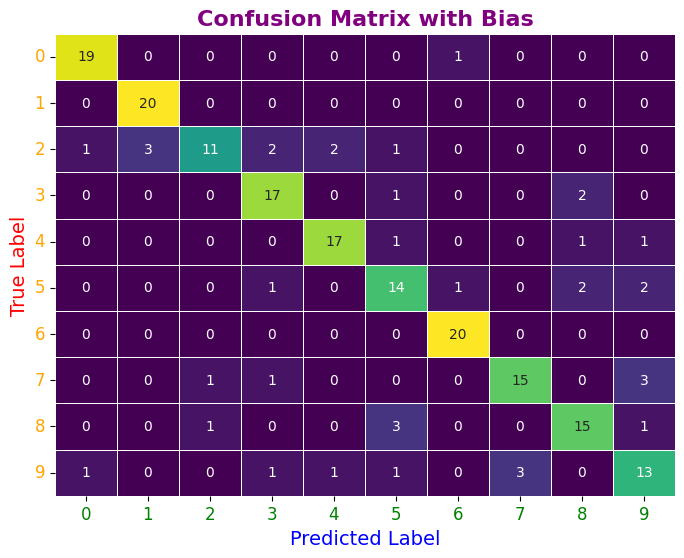

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="viridis", linewidths=0.5, cbar=False)

plt.xlabel("Predicted Label", fontsize=14, color="blue")
plt.ylabel("True Label", fontsize=14, color="red")
plt.title("Confusion Matrix with Bias", fontsize=16, fontweight="bold", color="purple")
plt.xticks(ticks=np.arange(10) + 0.5, labels=[f"{i}" for i in range(10)], fontsize=12, color="green")
plt.yticks(ticks=np.arange(10) + 0.5, labels=[f"{i}" for i in range(10)], fontsize=12, color="orange", rotation=0)
plt.savefig("Confusion_WithBias.jpg", dpi=300)
plt.show()

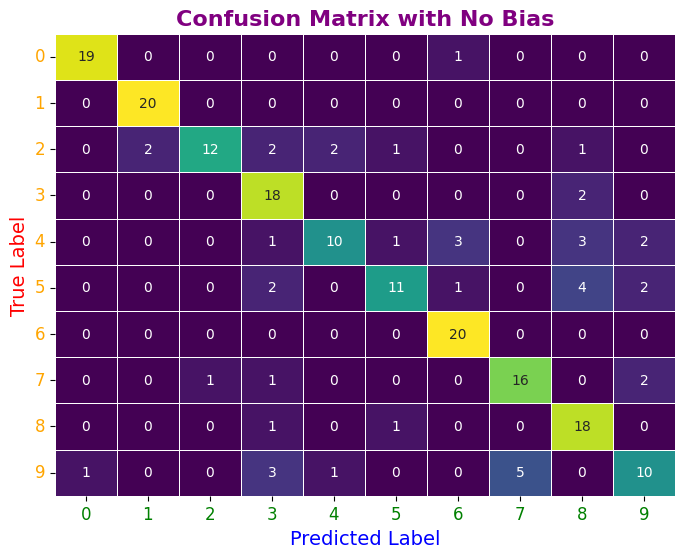

In [19]:
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix_nobias, annot=True, fmt="d", cmap="viridis", linewidths=0.5, cbar=False)

plt.xlabel("Predicted Label", fontsize=14, color="blue")
plt.ylabel("True Label", fontsize=14, color="red")
plt.title("Confusion Matrix with No Bias", fontsize=16, fontweight="bold", color="purple")
plt.xticks(ticks=np.arange(10) + 0.5, labels=[f"{i}" for i in range(10)], fontsize=12, color="green")
plt.yticks(ticks=np.arange(10) + 0.5, labels=[f"{i}" for i in range(10)], fontsize=12, color="orange", rotation=0)
plt.savefig("Confusion_NoBias.jpg", dpi=300)
plt.show()